In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mplt
import pylab as plt
from matplotlib import rc
from pylab import figure, show, legend, xlabel, ylabel
df=pd.read_csv("/home/vanemtzl/Actividad 6/AtlanticEnero.csv", parse_dates=['Date Time'])

In [2]:
df.columns=['Date','Water Level','Sigma','I','L']

In [3]:
df.head()

,Date,Water Level,Sigma,I,L
0,2017-01-01 00:00:00,0.784,0.184,0,0
1,2017-01-01 01:00:00,0.925,0.178,0,0
2,2017-01-01 02:00:00,0.933,0.191,0,0
3,2017-01-01 03:00:00,0.836,0.199,0,0
4,2017-01-01 04:00:00,0.696,0.179,0,0


In [4]:
df.describe()

,Water Level,Sigma,I,L
count,744.000000,744.000000,744.0,744.0
mean,0.720546,0.110665,0.0,0.0
std,0.524285,0.056423,0.0,0.0
min,-0.416000,0.037000,0.0,0.0
25%,0.319250,0.068000,0.0,0.0
50%,0.737000,0.095000,0.0,0.0
75%,1.120000,0.136000,0.0,0.0
max,2.111000,0.394000,0.0,0.0


In [5]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Date           0
Water Level    0
Sigma          0
I              0
L              0
dtype: int64

In [6]:
df.tail()

,Date,Water Level,Sigma,I,L
739,2017-01-31 19:00:00,0.251,0.109,0,0
740,2017-01-31 20:00:00,-0.039,0.107,0,0
741,2017-01-31 21:00:00,-0.088,0.094,0,0
742,2017-01-31 22:00:00,0.072,0.138,0,0
743,2017-01-31 23:00:00,0.353,0.170,0,0


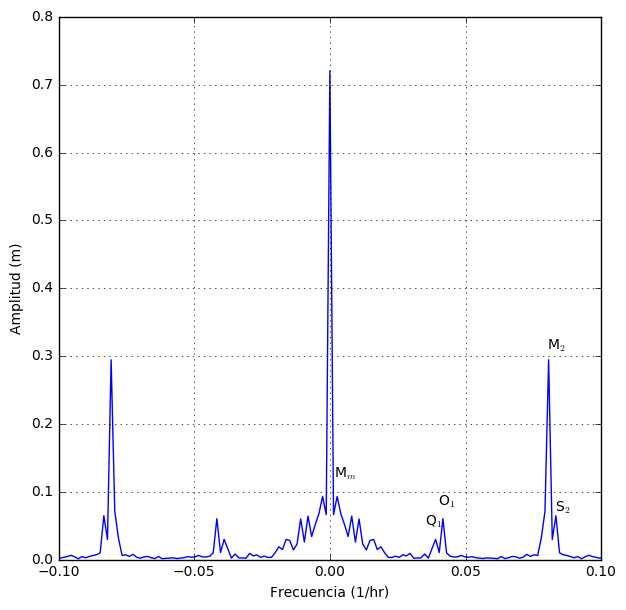

In [7]:
#Gráfica aproximando las frecuencias de los armónicos
from scipy.fftpack import fft, fftfreq, fftshift
# number of signal points
N = 744
# sample spacing
T = 1
x = df['Date']
y = df['Water Level']
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.xlim(-0.1, 0.1)
fig=plt.gcf()
fig.set_size_inches(7,7)

plt.xlabel("Frecuencia (1/hr)")
plt.ylabel("Amplitud (m)")

plt.text(.04,.08,"O$_1$")
plt.text(.08,.31,"M$_2$")
plt.text(.083,.07,"S$_2$")
plt.text(.0015,.12,"M$_m$")
plt.text(.035,.05,"Q$_1$")

plt.grid()
plt.show()

In [8]:
1/0.083 #0.37 frecuencia para pico con etiqueta S_2

12.048192771084336

In [9]:
1/0.04 #0.04 frecuencia para pico con etiqueta O_1

25.0

In [10]:
1/0.08 #0.08 frecuencia para pico con etiqueta M_2

12.5

In [11]:
1/0.0015 #0.0015 frecuencia para pico con etiqueta M_m

666.6666666666666

In [12]:
1/0.037 #0.37 frecuencia para pico con etiqueta Q_1

27.027027027027028

In [13]:
yf.real[1:10,]

array([  0.841155  , -46.03975602,  11.11657329,  35.98206796,
         4.77868017, -46.34424969, -18.70858681,   2.56877508,  -1.59320914])

In [14]:
1/yf.real[1:10,]

array([ 1.18884154, -0.02172036,  0.08995578,  0.02779162,  0.2092628 ,
       -0.02157765, -0.05345139,  0.3892906 , -0.62766398])